In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sb

import os
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,ComplementNB,BernoulliNB

import re
import emoji

from collections import Counter
from sklearn.datasets import make_classification

from imblearn.under_sampling import RandomUnderSampler
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

from nltk import FreqDist
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

# !pip install emoji

Using TensorFlow backend.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nikhiloswal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nikhiloswal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Reading dataset

In [13]:
train_data = pd.read_csv('./datasets/training-v1/offenseval-training-v1.tsv' , sep='\t')

## Exploratory Data Analysis

In [14]:
train_data

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN
5,97670,@USER Liberals are all Kookoo !!!,OFF,TIN,OTH
6,77444,@USER @USER Oh noes! Tough shit.,OFF,UNT,NaN
7,52415,@USER was literally just talking about this lo...,OFF,TIN,GRP
8,45157,@USER Buy more icecream!!!,NOT,NaN,NaN
9,13384,@USER Canada doesn’t need another CUCK! We alr...,OFF,TIN,IND


In [12]:
array = ['GRP', 'IND']
train_data.loc[train_data['subtask_c'].isin(array)]


,id,tweet,subtask_a,subtask_b,subtask_c
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
7,52415,@USER was literally just talking about this lo...,OFF,TIN,GRP
9,13384,@USER Canada doesn’t need another CUCK! We alr...,OFF,TIN,IND
12,28414,@USER you are a lying corrupt traitor!!! Nobod...,OFF,TIN,IND
20,56117,@USER @USER @USER @USER LOL!!! Throwing the ...,OFF,TIN,IND
22,12681,@USER @USER Kind of like when conservatives wa...,OFF,TIN,GRP
23,82904,@USER @USER Da fuck is going on people? Ther...,OFF,TIN,GRP
25,77665,@USER Tbh these days i just don't like people ...,OFF,TIN,IND
32,12609,The only thing the Democrats have is lying and...,OFF,TIN,GRP
36,12108,@USER @USER @USER @USER @USER @USER @USER @USE...,OFF,TIN,IND


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13240 entries, 0 to 13239
Data columns (total 5 columns):
id           13240 non-null int64
tweet        13240 non-null object
subtask_a    13240 non-null object
subtask_b    4400 non-null object
subtask_c    3876 non-null object
dtypes: int64(1), object(4)
memory usage: 517.3+ KB


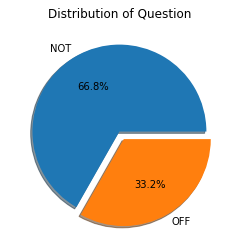

In [5]:
ax=train_data['subtask_a'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%' ,shadow=True)
ax.set_title('Distribution of Question')
ax.set_ylabel('')
plt.show()

Offensive:  4400
Not Offensive :  8840


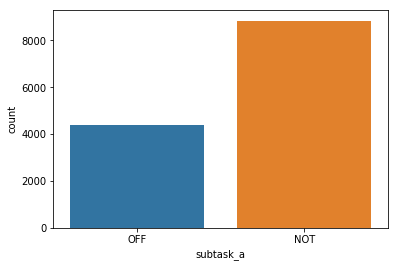

In [6]:
plot_sb = sb.countplot(train_data['subtask_a'], label='Total')
NOT, OFF  = train_data['subtask_a'].value_counts()
print('Offensive: ',OFF)
print('Not Offensive : ',NOT)

## Preprocessing Dataset

In [7]:
def handle_emoji(text):
    # Dictionnary of "important" emojis : 
    emoji_dict =  {'♥️': ' love ',
                   '❤️' : ' love ',
                   '❤' : ' love ',
                   '😘' : ' kisses ',
                  '😭' : ' cry ',
                  '💪' : ' strong ',
                  '🌍' : ' earth ',
                  '💰' : ' money ',
                  '👍' : ' ok ',
                   '👌' : ' ok ',
                  '😡' : ' angry ',
                  '🍆' : ' dick ',
                  '🤣' : ' haha ',
                  '😂' : ' haha ',
                  '🖕' : ' fuck you '}

    for cha in emoji_dict:
        text = re.compile(str(cha)).sub(str(emoji_dict[cha]),text)
    # Remove ALL emojis
    text = emoji.get_emoji_regexp().sub(r' ',text) 
    text = re.compile("([\U0001f3fb-\U0001f3ff])").sub(r'',text) 
    text = re.compile("([\U00010000-\U0010ffff])").sub(r'',text) 
    text = re.compile("(\u00a9|\u00ae|[\u2000-\u3300]|\ud83c[\ud000-\udfff]|\ud83d[\ud000-\udfff]|\ud83e[\ud000-\udfff])").sub(r'',text)

    # Add Space between  the Emoji Expressions : 
    text = re.compile("([\U00010000-\U0010ffff])").sub(r' \1 ',text) 
    return text


In [8]:
def clean_tweet(text):
    ''' Function that is applied to every to tweet in the dataset '''

    # =========== TEXT ===========
    # Replace @USER by <user>
    text = re.compile(r'@USER').sub(r'<user>',text)

    # Replace URL by <url>
    text = re.compile(r'URL').sub(r'<url>',text)

    # Remove numbers :
    text = re.compile(r'[0-9]+').sub(r' ',text)

    # Remove some special characters
    text = re.compile(r'([\xa0_\{\}\[\]¬•$,:;/@#|\^*%().~`”"“-])').sub(r' ',text) 

    # Space the special characters with white spaces
    text = re.compile(r'([$&+,:;=?@#|\'.^*()%!"’“-])').sub(r' \1 ',text)

    # Replace some special characters : 
    replace_dict = {r'&' : 'and' , r'&amp;' : 'and' , 
                    r'\+' : 'plus'}
    for cha in replace_dict:
        text = re.compile(str(cha)).sub(str(replace_dict[cha]),text)

    # Handle Emoji : translate some and delete the others
    text = handle_emoji(text)

    # Word delengthening : 
    text = re.compile(r'(.)\1{3,}').sub(r'\1\1',text)

    # Cut the words with caps in them : 
    text = re.compile(r'([a-z]+|[A-Z]+|[A-Z][a-z]+)([A-Z][a-z]+)').sub(r'\1 \2',text)
    text = re.compile(r'([a-z]+|[A-Z]+|[A-Z][a-z]+)([A-Z][a-z]+)').sub(r'\1 \2',text)        
    # =========== TOKENS ===========
    # TOKENIZE 
    text = text.split(' ')

    # Remove white spaces tokens
    text = [text[i] for i in range(len(text)) if text[i] != ' ']

    # Remove empty tokens
    text = [text[i] for i in range(len(text)) if text[i] != '']

    # Remove repetition in tokens (!!! => !)
    text = [text[i] for i in range(len(text)) if text[i] != text[i-1]]

    #  Handle the ALL CAPS Tweets 
    ### if ratio of caps in the word > 75% add allcaps tag <allcaps>
    caps_r = np.mean([text[i].isupper() for i in range(len(text))])
    if caps_r > 0.6 : 
        text.append('<allcaps>')

    # Lower Case : 
    text = [text[i].lower() for i in range(len(text))]
    
    return " ".join(str(x) for x in text)

In [9]:
train_data['subtask_a'].replace({'NOT':0, 'OFF': 1}, inplace= True)

In [10]:
train_data["preprocessed_tweet"] = train_data["tweet"].apply(clean_tweet)

In [11]:
train_data.head()

,id,tweet,subtask_a,subtask_b,subtask_c,preprocessed_tweet
0,86426,@USER She should ask a few native Americans wh...,1,UNT,NaN,<user> she should ask a few native americans w...
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,1,TIN,IND,<user> go home you re drunk ! <user> maga trum...
2,16820,Amazon is investigating Chinese employees who ...,0,NaN,NaN,amazon is investigating chinese employees who ...
3,62688,"@USER Someone should'veTaken"" this piece of sh...",1,UNT,NaN,<user> someone should ' ve taken this piece of...
4,43605,@USER @USER Obama wanted liberals &amp; illega...,0,NaN,NaN,<user> obama wanted liberals and amp illegals ...


## Word Cloud

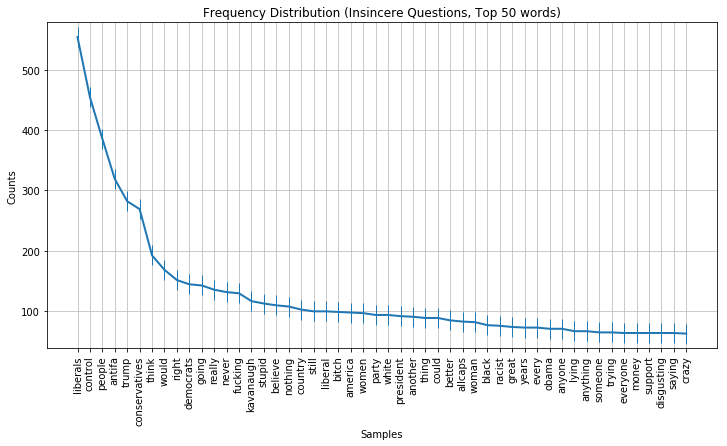

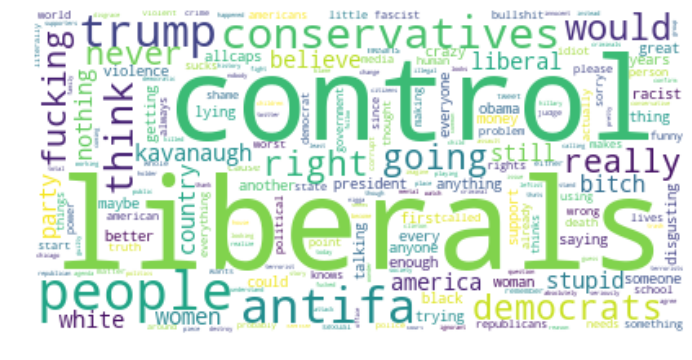

In [12]:
offensive = train_data.loc[train_data['subtask_a'] == 1].values
len(offensive)
offensive[0][1]

stop_words = set(stopwords.words('english'))
word_tokens = [word_tokenize(question[5]) for question in offensive]

#freq_dist = FreqDist([word for question in insincere_questions for word in question[1].split()])
all_words = [word for question in word_tokens for word in question]
len(all_words)
without_stopwords = [w for w in all_words if not w in stop_words]
words_len = [w for w in without_stopwords if not len(w)<5]
freq_dist = FreqDist([word for word in words_len])

plt.figure(figsize=(12,6))
plt.title(f'Frequency Distribution (Insincere Questions, Top 50 words)')
freq_dist.plot(50, marker='|', markersize=20)
plt.show()

from wordcloud import WordCloud

wordcloud = WordCloud(background_color='White').generate_from_frequencies(freq_dist)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## Feature Extraction

In [13]:
X = train_data["preprocessed_tweet"].values
y = train_data["subtask_a"].values

In [14]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, test_size=0.25)
#train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, stratify=train_y, test_size=0.1)

In [15]:
print("Train shape : ",train_X.shape)
#print("Validation shape : ",val_X.shape)
print("Test shape : ",test_X.shape)

Train shape :  (9930,)
Test shape :  (3310,)


In [16]:
unique, counts = np.unique(train_y, return_counts=True)
print(np.asarray((unique, counts)).T)

# unique, counts = np.unique(val_y, return_counts=True)
# print(np.asarray((unique, counts)).T)

unique, counts = np.unique(test_y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 6630]
 [   1 3300]]
[[   0 2210]
 [   1 1100]]


In [17]:
testdf = pd.DataFrame()
testdf['tweet'] = test_X

testdf['subtask_a'] = test_y
testdf.shape

(3310, 2)

### Using TFIDF

In [18]:
def tfidf_vectorizer(X, train_X, test_X):
    
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_vectorizer.fit(X)

    train_text_features_tf = tfidf_vectorizer.transform(train_X)
    test_text_features_tf = tfidf_vectorizer.transform(test_X)
    
    return train_text_features_tf, test_text_features_tf

### Using Count Vectorizer

In [19]:
def count_vectorizer(X, train_X, test_X):
    
    count_vectorizer = CountVectorizer()
    count_vectorizer.fit(X)

    train_text_features_cv = count_vectorizer.transform(train_X)
    test_text_features_cv = count_vectorizer.transform(test_X)
    
    return train_text_features_cv, test_text_features_cv

## Undersampling

In [20]:
def undersampleData(train_text_features_tf, train_y):
    rus = RandomUnderSampler(random_state=0)
    X_resampled, y_resampled = rus.fit_resample(train_text_features_tf, train_y)
    return X_resampled, y_resampled

## Oversampling

In [21]:
def oversampleData(train_text_features_tf, train_y):
    from imblearn.over_sampling import SMOTE
    smote = SMOTE('minority')
    x_oversampled, y_oversampled = smote.fit_sample(train_text_features_tf, train_y)
    return x_oversampled, y_oversampled

## Function for Confusion Matrix

In [22]:
def getConfusionMatrix(y_test, y_pred):
  # Confusion matrix
  mat = confusion_matrix(y_test, y_pred)
  cm = pd.DataFrame(mat)
  TP = cm.iloc[1,1] # True Positive
  TN = cm.iloc[0,0] # True Negative
  FP = cm.iloc[0,1] # False Positive
  FN = cm.iloc[1,0] # False Negative

  print('Sensitivity: {:.2%}'.format(TP/(FN+TP)))
  print('Specificity: {:.2%}'.format(TN/(FP+TN)))
  
  sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
  plt.title('A confusion matrix showing the frequency of misclassifications by our classifier')
  plt.xlabel('true label')
  plt.ylabel('predicted label');
  plt.show()

## Model

In [23]:
def model(model, X, train_X, train_y, test_X, test_y, tfidf = True, cv = False, undersampled = False, oversample = False):
    
    if tfidf:
        print('Feature Extraction using TFIFD')
        train_text_features, test_text_features = tfidf_vectorizer(X, train_X, test_X)
    
    if cv:
        print('Feature Extraction using CV')
        train_text_features, test_text_features = count_vectorizer(X, train_X, test_X)

    if undersampled:
        print('Undersampling the dataset')
        train_text_features, train_y = undersampleData(train_text_features, train_y)

    if oversample:
        print('Oversampling the dataset')
        train_text_features, train_y = oversampleData(train_text_features, train_y)
        
    model.fit(train_text_features, train_y)

    # predict the labels on validation dataset
    predictions = model.predict(test_text_features)

    # Use accuracy_score function to get the accuracy
    print("Accuracy Score -> ",accuracy_score(predictions, test_y)*100)

    print('F1Score', f1_score(predictions, test_y, average="macro"))
    print('Precision', precision_score(predictions, test_y, average="macro"))
    print('Recall', recall_score(predictions, test_y, average="macro"))

    getConfusionMatrix(test_y, predictions)

## Naive Bayes (Unsampling, TFIDF)

Feature Extraction using TFIFD
Undersampling the dataset
Accuracy Score ->  68.30815709969788
F1Score 0.6741165564602059
Precision 0.70696421225833
Recall 0.6836918658672964
Sensitivity: 77.82%
Specificity: 63.57%


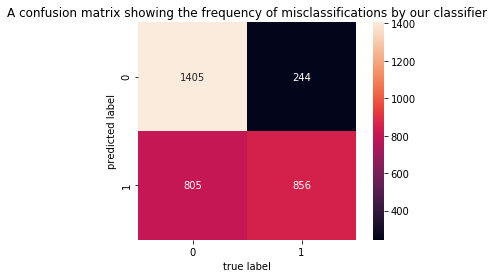

In [24]:
model(naive_bayes.MultinomialNB(), X, train_X, train_y,
      test_X, test_y, tfidf = True, cv = False, undersampled = True, oversample = False)

## Naive Bayes (Unsampling, CV)

Feature Extraction using CV
Undersampling the dataset
Accuracy Score ->  66.70694864048339
F1Score 0.6591673173187578
Precision 0.6940600575894693
Recall 0.6724001835972788
Sensitivity: 77.45%
Specificity: 61.36%


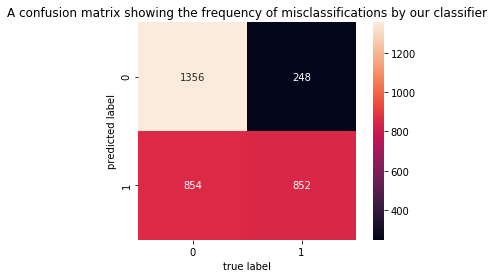

In [25]:
model(naive_bayes.MultinomialNB(), X, train_X, train_y,
      test_X, test_y, tfidf = False, cv = True, undersampled = True, oversample = False)

## Naive Bayes

Feature Extraction using CV
Accuracy Score ->  74.74320241691844
F1Score 0.6939200349001686
Precision 0.6841526120937886
Recall 0.7181881718543472
Sensitivity: 49.55%
Specificity: 87.29%


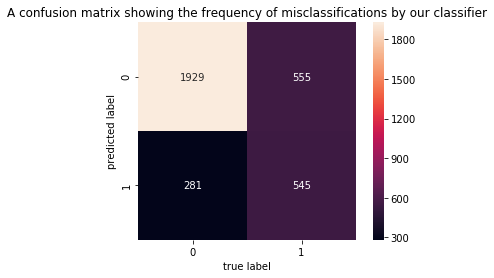

In [26]:
model(naive_bayes.MultinomialNB(), X, train_X, train_y,
      test_X, test_y, tfidf = False, cv = True, undersampled = False, oversample = False)

Feature Extraction using TFIFD
Accuracy Score ->  69.7583081570997
F1Score 0.5017934809167766
Precision 0.549109419991773
Recall 0.7785301837270342
Sensitivity: 10.64%
Specificity: 99.19%


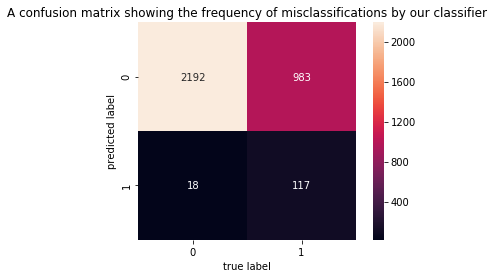

In [27]:
model(naive_bayes.MultinomialNB(), X, train_X, train_y,
      test_X, test_y, tfidf = True, cv = False, undersampled = False, oversample = False)

### Naive Bayes (Oversampling, CV)

Feature Extraction using TFIFD
Oversampling the dataset
Accuracy Score ->  68.8821752265861
F1Score 0.6746851145038169
Precision 0.6973364870423695
Recall 0.6763176271684799
Sensitivity: 72.27%
Specificity: 67.19%


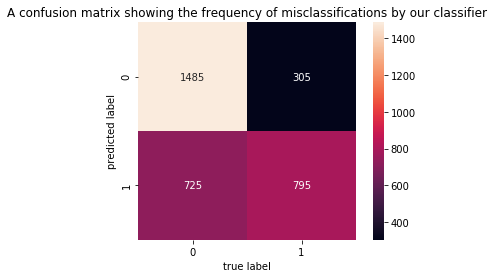

In [28]:
model(naive_bayes.MultinomialNB(), X, train_X, train_y,
      test_X, test_y, tfidf = True, cv = False, undersampled = False, oversample = True)

### Naive Bayes (Oversampling, TFIDF)

Feature Extraction using TFIFD
Oversampling the dataset
Accuracy Score ->  68.94259818731118
F1Score 0.6750589494488184
Precision 0.6973323735088441
Recall 0.676421329653744
Sensitivity: 72.09%
Specificity: 67.38%


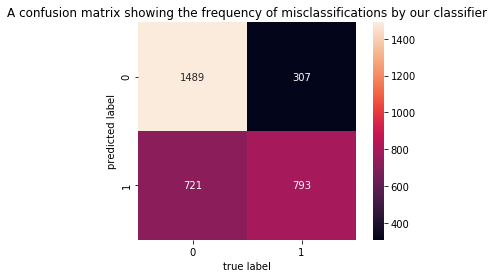

In [29]:
model(naive_bayes.MultinomialNB(), X, train_X, train_y,
      test_X, test_y, tfidf = True, cv = False, undersampled = False, oversample = True)

## SVM (Undersampling, TFIDF)


Feature Extraction using TFIFD
Undersampling the dataset
Accuracy Score ->  72.68882175226587
F1Score 0.7041304506032406
Precision 0.7141999177293294
Recall 0.6997195518967068
Sensitivity: 67.64%
Specificity: 75.20%


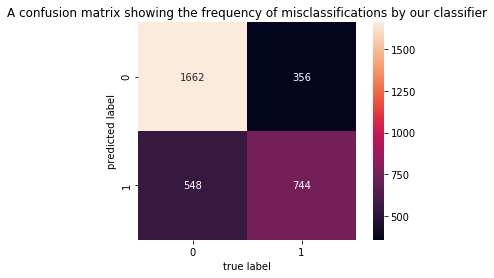

In [30]:
model(svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto'), X, train_X, train_y,
      test_X, test_y, tfidf = True, cv = False, undersampled = True, oversample = False)

## SVM (Undersampling, CV)

Feature Extraction using CV
Undersampling the dataset
Accuracy Score ->  70.57401812688822
F1Score 0.6836863083071958
Precision 0.6953948992184287
Recall 0.6801127987186721
Sensitivity: 66.45%
Specificity: 72.62%


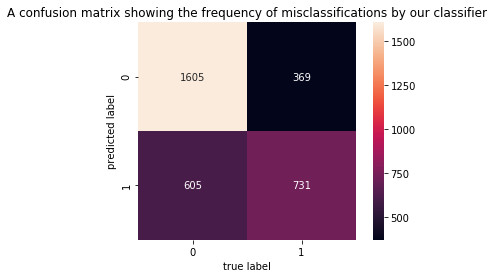

In [31]:
model(svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto'), X, train_X, train_y,
      test_X, test_y, tfidf = False, cv = True, undersampled = True, oversample = False)

## SVM

Feature Extraction using CV
Accuracy Score ->  74.32024169184291
F1Score 0.7008055651972693
Precision 0.6951398601398602
Recall 0.7097615611281496
Sensitivity: 55.18%
Specificity: 83.85%


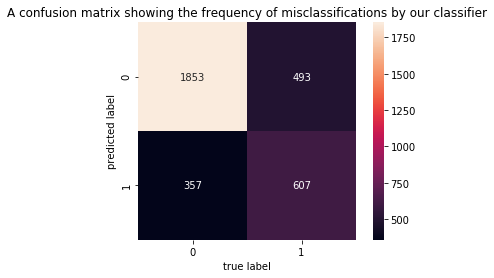

In [32]:
model(svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto'), X, train_X, train_y,
      test_X, test_y, tfidf = False, cv = True, undersampled = False, oversample = False)

Feature Extraction using TFIFD
Accuracy Score ->  77.49244712990937
F1Score 0.7086150200540975
Precision 0.6928691896338955
Recall 0.7773612217819053
Sensitivity: 44.82%
Specificity: 93.76%


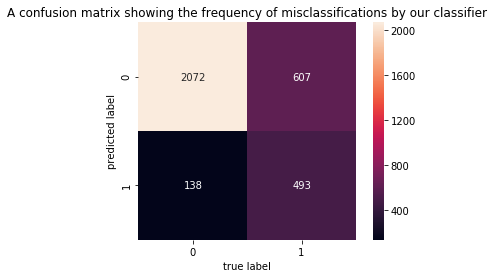

In [33]:
model(svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto'), X, train_X, train_y,
      test_X, test_y, tfidf = True, cv = False, undersampled = False, oversample = False)

Feature Extraction using TFIFD
Oversampling the dataset
Accuracy Score ->  75.25679758308156
F1Score 0.718533294418541
Precision 0.7165364047716989
Recall 0.7208230609079838
Sensitivity: 60.91%
Specificity: 82.40%


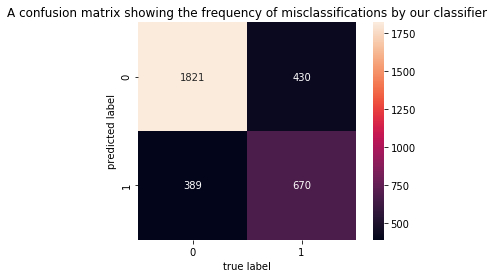

In [34]:
model(svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto'), X, train_X, train_y,
      test_X, test_y, tfidf = True, cv = False, undersampled = False, oversample = True)

Feature Extraction using CV
Oversampling the dataset
Accuracy Score ->  64.16918429003022
F1Score 0.6231611435698006
Precision 0.6392122583299054
Recall 0.6250192095705035
Sensitivity: 63.18%
Specificity: 64.66%


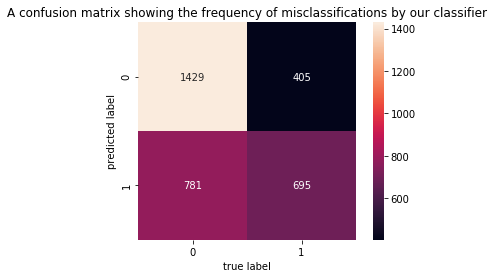

In [35]:
model(svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto'), X, train_X, train_y,
      test_X, test_y, tfidf = False, cv = True, undersampled = False, oversample = True)

### Random Forest

Feature Extraction using CV
Oversampling the dataset
Accuracy Score ->  58.549848942598196
F1Score 0.5414394051996562
Precision 0.542566844919786
Recall 0.5411094302204368
Sensitivity: 41.45%
Specificity: 67.06%


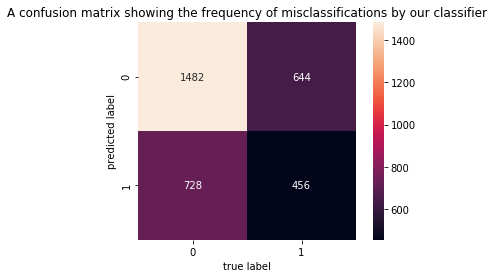

In [72]:
#Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier

model(RandomForestClassifier(n_estimators=100, max_depth=20,random_state=0), X, train_X, train_y,
      test_X, test_y, tfidf = False, cv = True, undersampled = False, oversample = True)


Feature Extraction using CV
Undersampling the dataset
Accuracy Score ->  72.59818731117825
F1Score 0.6927210852534023
Precision 0.6936589880707528
Recall 0.6918541698843744
Sensitivity: 59.73%
Specificity: 79.00%


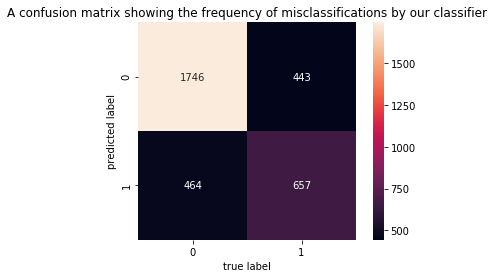

In [66]:
#Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier

model(RandomForestClassifier(n_estimators=100, max_depth=20,random_state=0), X, train_X, train_y,
      test_X, test_y, tfidf = False, cv = True, undersampled = True, oversample = False)


Feature Extraction using CV
Accuracy Score ->  67.09969788519638
F1Score 0.4110627254411773
Precision 0.505
Recall 0.8349499848438922
Sensitivity: 1.00%
Specificity: 100.00%


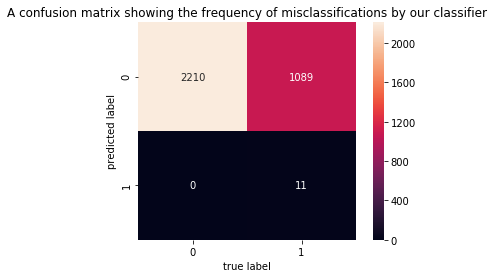

In [67]:
#Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier

model(RandomForestClassifier(n_estimators=100, max_depth=20,random_state=0), X, train_X, train_y,
      test_X, test_y, tfidf = False, cv = True, undersampled = False, oversample = False)


Feature Extraction using TFIFD
Accuracy Score ->  67.16012084592144
F1Score 0.41298757066681935
Precision 0.5059090909090909
Recall 0.8351531695480741
Sensitivity: 1.18%
Specificity: 100.00%


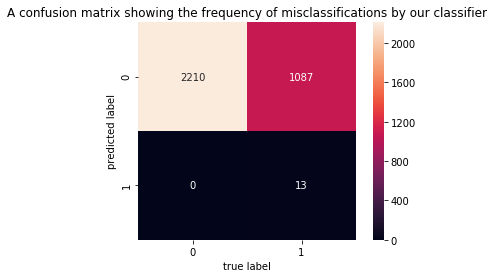

In [68]:
#Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier

model(RandomForestClassifier(n_estimators=100, max_depth=20,random_state=0), X, train_X, train_y,
      test_X, test_y, tfidf = True, cv = False, undersampled = False, oversample = False)


Feature Extraction using TFIFD
Undersampling the dataset
Accuracy Score ->  69.06344410876133
F1Score 0.6684613792485526
Precision 0.6804298642533937
Recall 0.6656173633829023
Sensitivity: 65.00%
Specificity: 71.09%


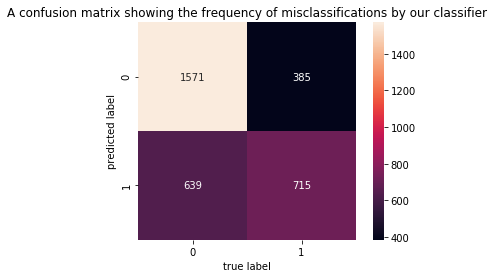

In [69]:
#Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier

model(RandomForestClassifier(n_estimators=100, max_depth=20,random_state=0), X, train_X, train_y,
      test_X, test_y, tfidf = True, cv = False, undersampled = True, oversample = False)


Feature Extraction using TFIFD
Oversampling the dataset
Accuracy Score ->  69.72809667673717
F1Score 0.6379433437039463
Precision 0.6326696832579185
Recall 0.6519314113435086
Sensitivity: 44.00%
Specificity: 82.53%


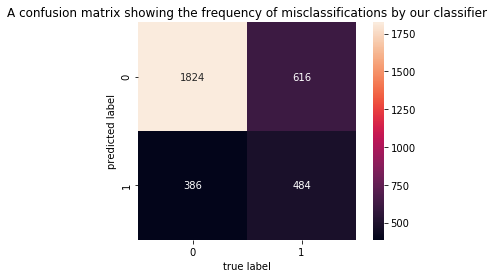

In [70]:
#Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier

model(RandomForestClassifier(n_estimators=100, max_depth=20,random_state=0), X, train_X, train_y,
      test_X, test_y, tfidf = True, cv = False, undersampled = False, oversample = True)


## Logistic Regression

Feature Extraction using CV


/Users/nikhiloswal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy Score ->  76.04229607250755
F1Score 0.7090382131284032
Precision 0.6979905388728918
Recall 0.7359238067788851
Sensitivity: 51.18%
Specificity: 88.42%


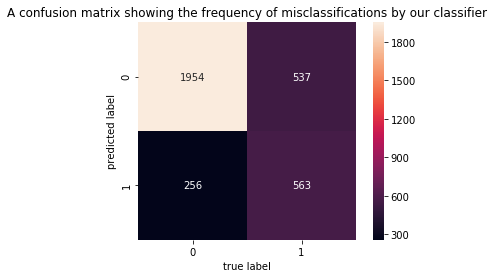

In [73]:
from sklearn.linear_model import LogisticRegression

model(LogisticRegression(), X, train_X, train_y,
      test_X, test_y, tfidf = False, cv = True, undersampled = False, oversample = False)


Feature Extraction using TFIFD
Accuracy Score ->  75.89123867069486
F1Score 0.6741754655006269
Precision 0.6623858494446729
Recall 0.7712500755839201
Sensitivity: 37.45%
Specificity: 95.02%


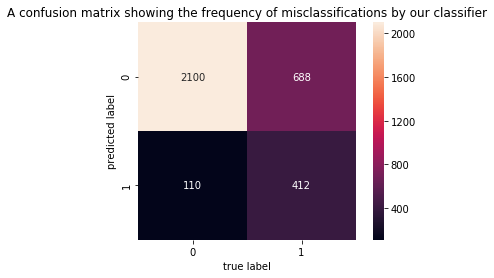

In [74]:
from sklearn.linear_model import LogisticRegression

model(LogisticRegression(), X, train_X, train_y,
      test_X, test_y, tfidf = True, cv = False, undersampled = False, oversample = False)


Feature Extraction using TFIFD
Undersampling the dataset
Accuracy Score ->  71.63141993957703
F1Score 0.6929532742354654
Precision 0.7028568490333196
Recall 0.688882135050468
Sensitivity: 66.27%
Specificity: 74.30%


/Users/nikhiloswal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


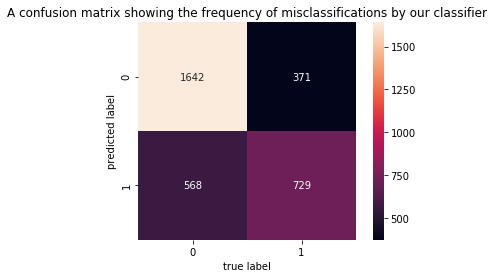

In [75]:
from sklearn.linear_model import LogisticRegression

model(LogisticRegression(), X, train_X, train_y,
      test_X, test_y, tfidf = True, cv = False, undersampled = True, oversample = False)


Feature Extraction using CV
Accuracy Score ->  76.04229607250755
F1Score 0.7090382131284032
Precision 0.6979905388728918
Recall 0.7359238067788851
Sensitivity: 51.18%
Specificity: 88.42%


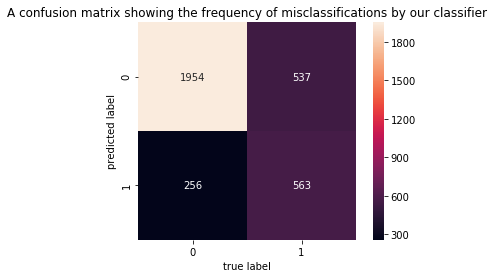

In [79]:
from sklearn.linear_model import LogisticRegression

model(LogisticRegression(), X, train_X, train_y,
      test_X, test_y, tfidf = False, cv = True, undersampled = False, oversample = False)


Feature Extraction using CV
Undersampling the dataset
Accuracy Score ->  72.20543806646525
F1Score 0.69845396759004
Precision 0.7078403948992185
Recall 0.6942273805020711
Sensitivity: 66.55%
Specificity: 75.02%


/Users/nikhiloswal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


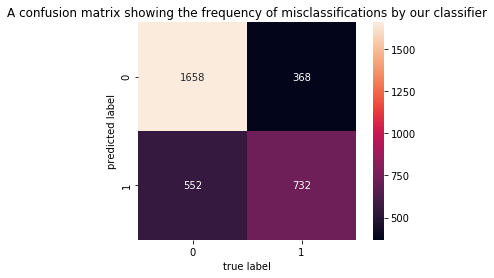

In [76]:
from sklearn.linear_model import LogisticRegression

model(LogisticRegression(), X, train_X, train_y,
      test_X, test_y, tfidf = False, cv = True, undersampled = True, oversample = False)


Feature Extraction using CV
Oversampling the dataset
Accuracy Score ->  66.43504531722054
F1Score 0.6413045460872269
Precision 0.6527560674619498
Recall 0.6396909157457072
Sensitivity: 61.82%
Specificity: 68.73%


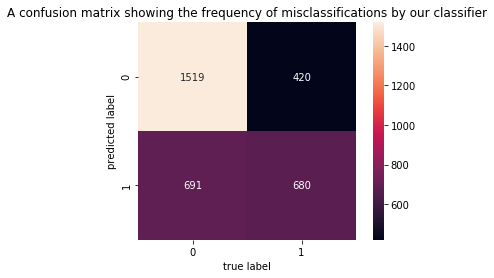

In [77]:
from sklearn.linear_model import LogisticRegression

model(LogisticRegression(), X, train_X, train_y,
      test_X, test_y, tfidf = False, cv = True, undersampled = False, oversample = True)


Feature Extraction using TFIFD
Oversampling the dataset
Accuracy Score ->  74.65256797583082
F1Score 0.7086821140915767
Precision 0.7049341834635953
Recall 0.7136359601557645
Sensitivity: 58.09%
Specificity: 82.90%


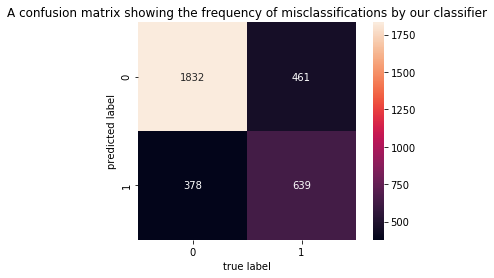

In [78]:
from sklearn.linear_model import LogisticRegression

model(LogisticRegression(), X, train_X, train_y,
      test_X, test_y, tfidf = True, cv = False, undersampled = False, oversample = True)
